In [4]:
# Import matplotlib for graphs, set inline
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import json

In [45]:
inputs = [
#           {
#             "name": 1,
#             "path": '../data/models/1/cv/checkpoint_18700.json',
#             "epoch": 30
#            },
#           {
#             "name": 2,
#             "path": '../data/models/2/cv/checkpoint_6250.json',
#             "epoch": 14.10
#           },
#           {
#             "name": 3,
#             "path": '../data/models/3/cv/checkpoint_19250.json',
#             "epoch": 15
#           },
#           {
#             "name": 4,
#             "path": '../data/models/4/cv/checkpoint_19250.json',
#                 "epoch": 15
#            },
#           {
#             "name": 5,
#             "path": '../data/models/5/cv/checkpoint_10250.json',
#             "epoch": 8.5
#           },
#           {
#             "name": 6,
#             "path":  '../data/models/6/cv/checkpoint_272000.json',
#             "epoch": 21
#           },
#           {
#             "name": 7,
#             "path":  '../data/models/7/cv/checkpoint_98000.json',
#             "epoch": 14
#           },
#           {
#             "name": 8,
#             "path": '../data/models/8/cv/checkpoint_38000.json',
#             "epoch": 6.58
#           },
#           {
#             "name": 9,
#             "path": '../data/models/9/cv/checkpoint_43000.json',
#             "epoch": 7.31
#           },
          {
            "name": 10,
            "path":  '../data/models/10/cv/checkpoint_27500.json',
            "epoch": 20
          },
          {
            "name": 11.1,
            "path": '../data/models/11/cv/checkpoint_27500.json',
            "epoch": 20
          },
          {
            "name": 11.2,
            "path": '../data/models/11/cv-2/checkpoint_27500.json',
            "epoch": 20
          },
          {
            "name": 11.3,
            "path": '../data/models/11/cv-3/checkpoint_27500.json',
            "epoch": 20
          },
#           {
#             "name": 11.4,
#             "path": '../data/models/11/cv-4/checkpoint_52500.json',
#             "epoch": 20
#           },
          {
            "name": 12,
            "path": '../data/models/12/cv/checkpoint_27500.json',
            "epoch": 20
          }
        
        ]


In [46]:
# load the input data
checkpoints = map(lambda x: json.loads(open(x.get("path")).read()), inputs)

# 10 min val loss: 0.380 at epoch 9.09 (iteration 12750)
# 11.1 min val loss: 0.354 at epoch 19.64 (iteration 27250)
# 11.2 min val loss: 0.344 at epoch 14.73 (iteration 20500)
# 11.3 min val loss: 0.350 at epoch 14.73 (iteration 20500)
# 12 min val loss: 0.374 at epoch 9.27 (iteration 13000)


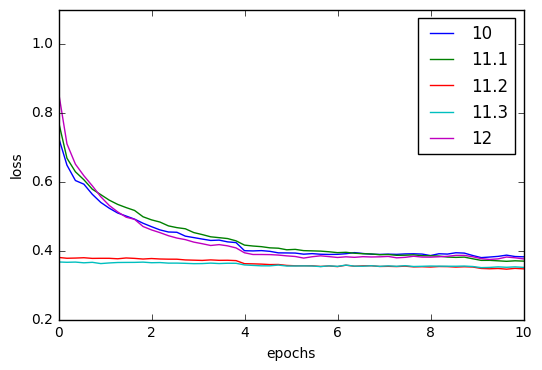

In [48]:
def add_domain(range_vals):
    domain = []
    for i in range(len(range_vals)):
        domain.append(translate(i, 0, len(range_vals), 0, epochs))
    return (domain, range_vals)
    
def translate(sensor_val, in_from, in_to, out_from, out_to):
    out_range = out_to - out_from
    in_range = in_to - in_from
    in_val = sensor_val - in_from
    val=(float(in_val)/in_range)*out_range
    out_val = out_from+val
    return out_val

# checkpoints = filter(lambda a: a.get("name") > 3, checkpoints)

for i in range(len(checkpoints)):
    checkpoint = checkpoints[i]
    epochs = inputs[i].get('epoch')
    val_loss = checkpoint['val_loss_history']
    train_loss = checkpoint['train_loss_history']
    loss = add_domain(val_loss)
    t_loss = add_domain(train_loss)
    m = min(val_loss)
    print ('# %s min val loss: %.3f at epoch %.2f (iteration %s)' % \
        (inputs[i].get('name'), \
         m, \
         translate(val_loss.index(m), 0, len(val_loss), 0, epochs), \
         checkpoint['val_loss_history_it'][val_loss.index(m)]
        ))
    plt.plot(loss[0], loss[1], label=inputs[i].get('name'))
    # uncomment to include training loss
    # plt.plot(t_loss[0], t_loss[1], label='%s training' % inputs[i].get('name'))

plt.ylim([0.2, 1.1])
plt.xlim([0, 10])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()